## PROJECT OVERVIEW


Corporate bankruptcy is a critical issue affecting businesses and stakeholders alike. By analyzing financial data, this project aims to:
Identify key financial indicators influencing bankruptcy.
Develop robust machine learning models to predict the likelihood of bankruptcy.
Provide actionable insights to mitigate financial risks.


## BUSINESS UNDERSTANDING


The Problem: Identifying and Mitigating Corporate Bankruptcy Risks
Corporate bankruptcy poses a significant risk to various stakeholders, including business owners, investors, creditors, and employees. In many cases, bankruptcy is preceded by a series of financial red flags that, if identified early, could provide opportunities for intervention. However, manually analyzing financial statements and predicting bankruptcy is time-consuming, subjective, and often inaccurate due to the complexity of financial systems.

Kenya's corporate landscape, like many other regions, has seen a surge in bankruptcy cases in recent years, making it crucial to develop reliable tools for predicting such outcomes. A proactive approach to identifying companies at risk of bankruptcy could lead to better decision-making, improved resource allocation, and the mitigation of cascading financial crises.

## DATA UNDERSTANDING


The dataset used in this project is sourced from Kaggle: Bankruptcy in Poland. It contains anonymized financial data of companies operating in Poland over several years. The dataset is structured to support binary classification, with the target variable indicating whether a company is bankrupt or not.

## Import Necessary libraries

In [ ]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


FETCH DATA

In [64]:
def wrangle(filename):
    data = arff.loadarff(filename)
    df = pd.DataFrame(data[0])
    df['class'] = df['class'].apply(lambda x: x == b'1')
    return df

In [65]:
df = wrangle("3year.arff")

EXPLORATORY DATA ANALYSIS EDA

Inspect the Data

In [66]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,False
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False


In [56]:
len(df)

10503

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10503 non-null  float64
 1   Attr2   10503 non-null  float64
 2   Attr3   10503 non-null  float64
 3   Attr4   10485 non-null  float64
 4   Attr5   10478 non-null  float64
 5   Attr6   10503 non-null  float64
 6   Attr7   10503 non-null  float64
 7   Attr8   10489 non-null  float64
 8   Attr9   10500 non-null  float64
 9   Attr10  10503 non-null  float64
 10  Attr11  10503 non-null  float64
 11  Attr12  10485 non-null  float64
 12  Attr13  10460 non-null  float64
 13  Attr14  10503 non-null  float64
 14  Attr15  10495 non-null  float64
 15  Attr16  10489 non-null  float64
 16  Attr17  10489 non-null  float64
 17  Attr18  10503 non-null  float64
 18  Attr19  10460 non-null  float64
 19  Attr20  10460 non-null  float64
 20  Attr21  9696 non-null   float64
 21  Attr22  10503 non-null  float64
 22

In [15]:
#df['class'] = df['class'].apply(lambda x: x == b'1')


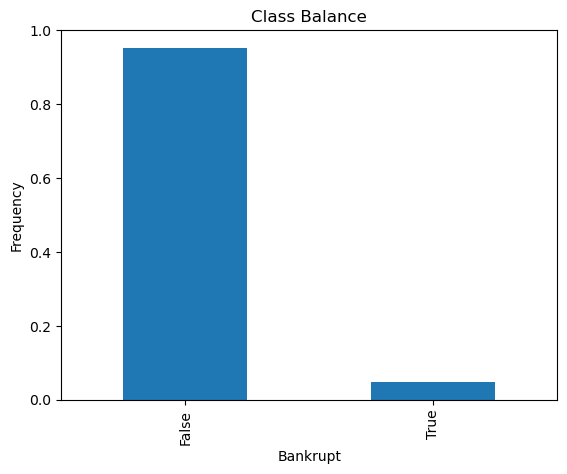

In [16]:
#Investigate the class balance
df["class"].value_counts(normalize = True).plot(
                                                kind = "bar",
                                                xlabel = "Bankrupt", 
                                                ylabel = "Frequency",
                                                title = "Class Balance");


Where b'1' represents the positive class(The company goes bankrupt) and b'0' represents the negative class (Company does not go bankrupt)

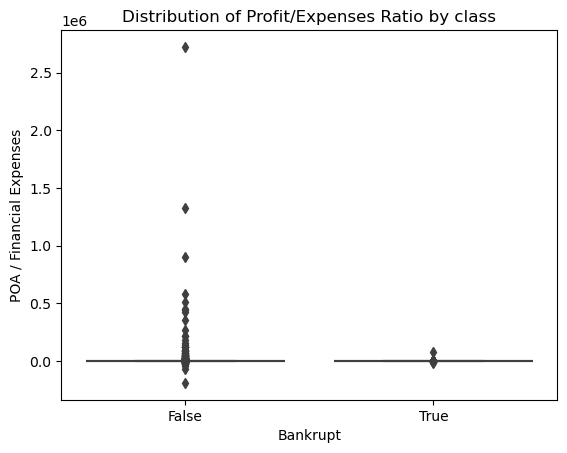

In [17]:
#Investigate bankruptcy based on company profitability
sns.boxplot(x = "class", y = "Attr27", data = df)
plt.xlabel("Bankrupt")
plt.ylabel("POA / Financial Expenses")
plt.title("Distribution of Profit/Expenses Ratio by class");
        

In [18]:
#Feature Summary Statistics
df["Attr27"].describe().apply("{0:,.0f}".format)

count        9,788
mean         1,186
std         34,691
min       -190,130
25%              0
50%              1
75%              5
max      2,723,000
Name: Attr27, dtype: object

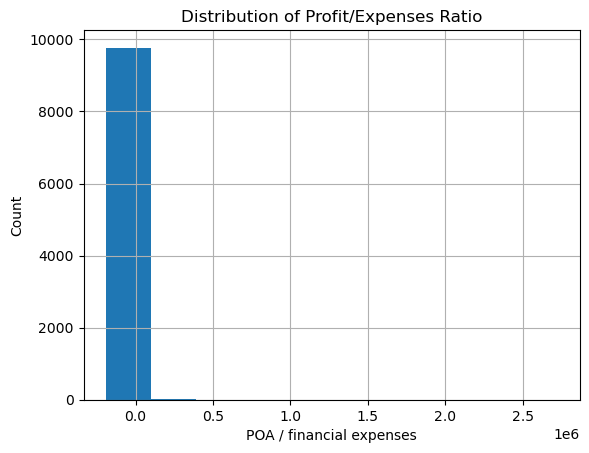

In [19]:
#Feature 27 histogram
df["Attr27"].hist()
plt.xlabel("POA / financial expenses")
plt.ylabel("Count"),
plt.title("Distribution of Profit/Expenses Ratio");

Summary statistics and histogram shows the data is highly skewed to the right

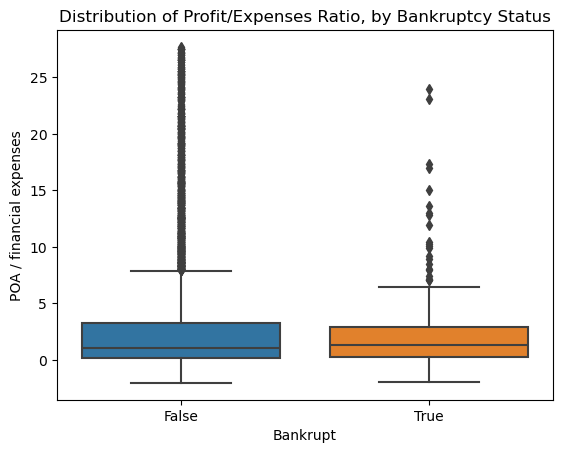

In [20]:
#Clipped feature histogram
q1, q9 = df["Attr27"].quantile([0.1, 0.9])
mask = df["Attr27"].between(q1,q9)
sns.boxplot(x = "class", y="Attr27", data = df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Bankruptcy Status");

Checking for multicollinearity

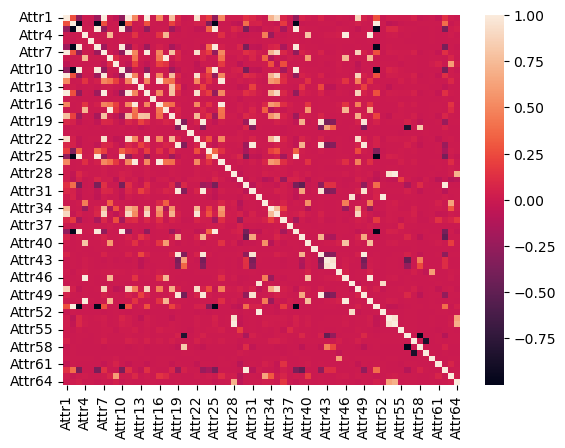

In [21]:
#Correlation matrix
corr = df.drop(columns = "class").corr()
sns.heatmap(corr);

Takeaways from EDA:
-First, our data is imbalanced. This is something we need to address in our data preparation.
-Many of our features have missing values that we'll need to impute. And since the features are highly skewed, the best imputation strategy is likely median, not mean.
-Finally, we have autocorrelation issues, which means that we should steer clear of linear models, and try a tree-based model instead.

SPLIT

In [22]:
target = "class"
X = df.drop(columns = target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (10503, 64)
y shape: (10503,)


In [23]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8402, 64)
y_train shape: (8402,)
X_test shape: (2101, 64)
y_test shape: (2101,)


In [26]:
#RESAMPLE
over_sampler = RandomOverSampler(random_state = 42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)

(16028, 64)


## MODELLING

In [24]:
#Baseline Accuracy
y_train = y_train.ravel()  # Convert to shape (n_samples,)
y_train_series = pd.Series(y_train)

# Calculate baseline accuracy
acc_baseline = y_train_series.value_counts(normalize=True).max()
print("Baseline Accuracy:",round(acc_baseline, 4))


Baseline Accuracy: 0.9538


Note here that, because our classes are imbalanced, the baseline accuracy is very high. We should keep this in mind because, even if our trained model gets a high validation accuracy score, that doesn't mean it's actually good.

# ITERATE: DecisionTreeClassifier

In [27]:
model_reg = make_pipeline(SimpleImputer(strategy = "median"), DecisionTreeClassifier(random_state =42))
# Fit on `X_train`, `y_train`
model_reg.fit(X_train, y_train)

# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(SimpleImputer(strategy = "median"), DecisionTreeClassifier(random_state =42))
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [128]:
for m in [model_reg,  model_over]:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9257
Training Accuracy: 1.0
Test Accuracy: 0.9453


CONFUSION MATRIX

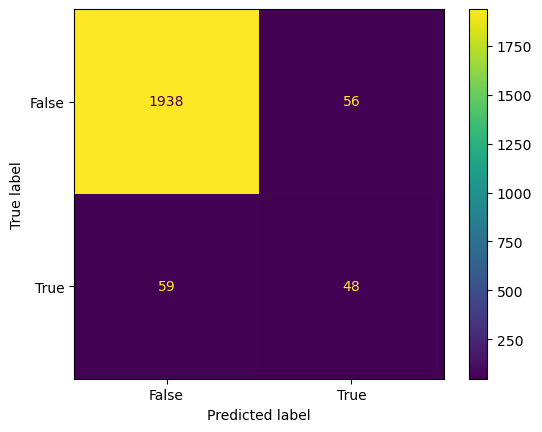

In [28]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_over, X_test, y_test);

In [29]:
# Calculate Tree depth
depth = model_over.named_steps["decisiontreeclassifier"].get_depth()
print(depth)

36


### COMMUNICATION

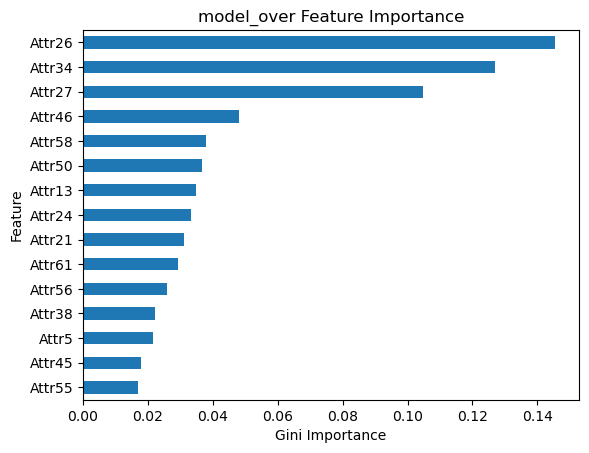

In [134]:
# Get importances
importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index = X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind = "barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

In [139]:
#Saving the model
with open("dt_classifier.pkl", "wb") as f:
    pickle.dump(model_over, f)

# RANDOM FOREST 

In [30]:
clf = make_pipeline(SimpleImputer(), RandomForestClassifier(random_state =42))
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


# Hyperparameter Tuning

## Cross-Validation

In [31]:
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv =5, n_jobs =-1)
print(cv_acc_scores)

[0.99656893 0.99781659 0.99781659 0.99625585 0.99812793]


In [32]:
#Parameter Grid
params = {
    "simpleimputer__strategy": ["mean", "median"],
    "randomforestclassifier__max_depth": range(10, 50, 10),
    "randomforestclassifier__n_estimators": range(25, 100, 25)
    }
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__max_depth': range(10, 50, 10),
 'randomforestclassifier__n_estimators': range(25, 100, 25)}

In [33]:
#Grid Search
model = GridSearchCV(clf, param_grid= params, cv =5, n_jobs =-1, verbose =1)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [34]:
#Train Model
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [35]:
#Grid Search CV results
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.256534,0.066540,0.047572,0.010812,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.976606,0.972863,0.984092,0.973167,0.978159,0.976978,0.004089,21
1,3.652706,0.085116,0.052569,0.020633,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.975983,0.973799,0.967249,0.966303,0.968799,0.970426,0.003795,24
2,6.888451,0.152870,0.065364,0.009174,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979102,0.976606,0.983157,0.972543,0.981591,0.978600,0.003758,20
3,6.952414,0.160665,0.063364,0.004627,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.977230,0.975359,0.971928,0.969111,0.970983,0.972922,0.002959,23
4,9.906322,0.096638,0.080155,0.005702,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.980973,0.977230,0.979414,0.975351,0.981279,0.978849,0.002262,19
5,9.846956,0.094173,0.080754,0.004066,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.976606,0.976294,0.974423,0.968487,0.975039,0.974170,0.002952,22
6,3.869181,0.033718,0.041977,0.000633,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.994697,0.997817,0.996257,0.995320,0.995632,0.995945,0.001063,18
7,4.057873,0.063830,0.042176,0.001166,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.997193,0.996569,0.996569,0.995008,0.995944,0.996256,0.000739,17
8,7.736765,0.439304,0.071559,0.008060,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.995633,0.997817,0.996881,0.995320,0.997192,0.996568,0.000946,16
9,8.646043,0.246052,0.094347,0.022831,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.997505,0.997817,0.997193,0.994696,0.996880,0.996818,0.001106,13


In [36]:
#Extracting best hypterparameters
model.best_params_

{'randomforestclassifier__max_depth': 30,
 'randomforestclassifier__n_estimators': 75,
 'simpleimputer__strategy': 'median'}

## Model Evaluation

In [39]:
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

In [40]:
print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9562


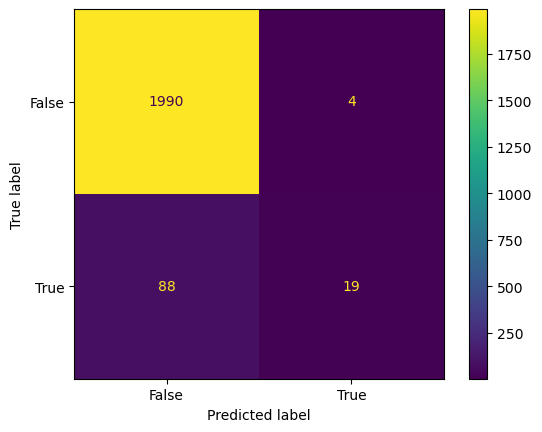

In [41]:
#CONFUSION MATRIX
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

## COMMUNICATE THE RESULTS

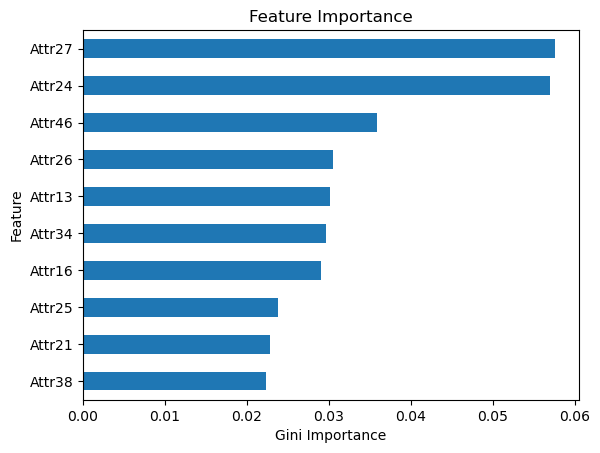

In [42]:
#Extract Feature Importances
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index = features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind = "barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [60]:
# Saving the model
with open("rf_classifier.pkl", "wb")as f:
    pickle.dump(model,f)

## Making Predictions

In [89]:
def make_predictions(data_filepath, model_filepath):
    # Wrangle JSON file
    X_test = wrangle(data_filepath)
    X_test.drop(columns = "class", inplace = True)
    # Load model
    with open(model_filepath, "rb")as f:
        model = pickle.load(f)
    # Generate predictions
    y_test_pred = model.predict(X_test)
    # Put predictions into Series with name "bankrupt", and same index as X_test
    y_test_pred = pd.Series(y_test_pred, index = X_test.index, name = "Bankrupt")
    return y_test_pred

In [92]:
y_test_pred = make_predictions(data_filepath = "1year.arff", model_filepath= "rf_classifier.pkl")

In [93]:
y_test_pred.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Bankrupt, dtype: bool

# Gradient Boosting Trees